# SPECT simulation 

Analysis after the simulation :
- in folder: spect/
- macro: main.mac

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot

In [2]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('./output_ref')                            # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'spect.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /Users/dsarrut/src/gate/dqprm/2022/gate-exercices/spect


In [3]:
print("List of keys: \n", f.keys())

List of keys: 
 ['latest_event_ID;1', 'total_nb_primaries;1', 'Hits;1', 'SinglesAdder;1', 'SinglesBlurring;1', 'Singles;1', 'SinglesThresholder;1', 'SinglesUpholder;1', 'scatter;1', 'peak171;1', 'peak245;1']


In [7]:
hits = f['Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 41
Hits: 
PDGEncoding  trackID  parentID  trackLocalTime  time  edep  stepLength  trackLength  posX  posY  posZ  localPosX  localPosY  localPosZ  momDirX  momDirY  momDirZ  headID  crystalID  pixelID  unused3ID  unused4ID  unused5ID  photonID  nPhantomCompton  nCrystalCompton  nPhantomRayleigh  nCrystalRayleigh  primaryID  sourcePosX  sourcePosY  sourcePosZ  sourceID  eventID  runID  axialPos  rotationAngle  volumeID  processName  comptVolName  RayleighVolName  

# Plot 1: position of hits, hits times (global & local)

Text(0.5, 0, 'Time in ns')

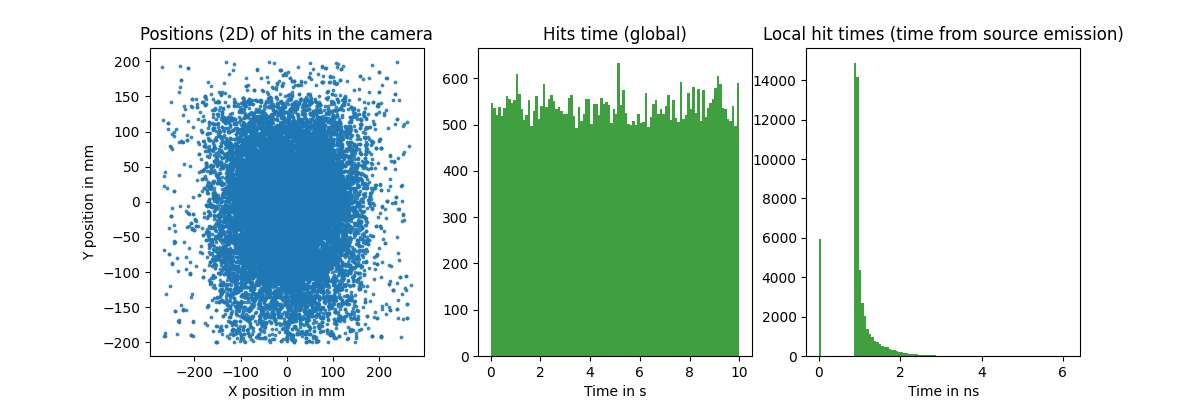

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1
hits_u = hits.arrays()['posX']
hits_v = hits.arrays()['posZ']
ax[0].scatter(hits_u, hits_v, alpha=0.8, s=3)
ax[0].set_title('Positions (2D) of hits in the camera')
ax[0].set_xlabel('X position in mm')
ax[0].set_ylabel('Y position in mm')
#ax[0].set_aspect('equal')

# Plot 2
times = hits.arrays()[b'time']
n, bins, patches = ax[1].hist(times, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Hits time (global)')
ax[1].set_xlabel('Time in s')

# Plot 3
times = hits.arrays()[b'trackLocalTime']*1e9
n, bins, patches = ax[2].hist(times, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Local hit times (time from source emission)')
ax[2].set_xlabel('Time in ns')

# Plot 2: edep, step length and track length

Text(0.5, 0, 'Length in mm')

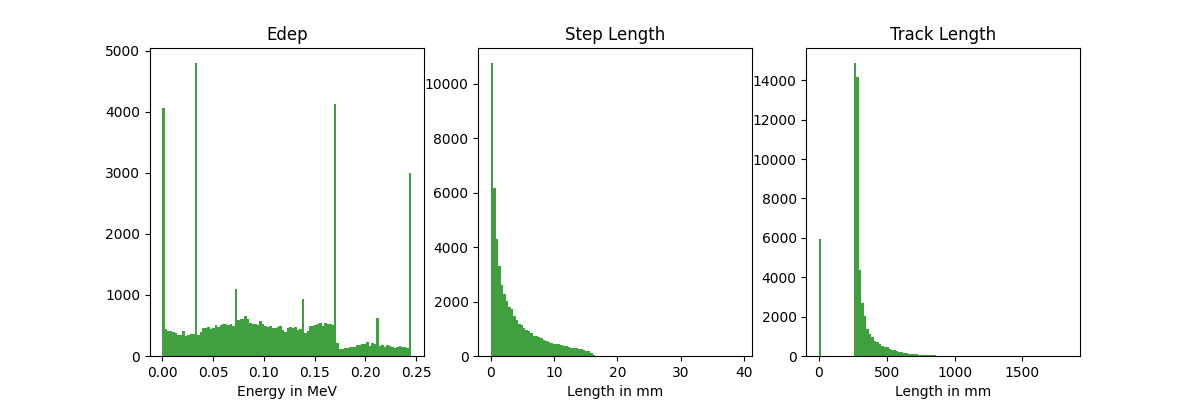

In [11]:
fig2, ax2 = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1
edep = hits.arrays()['edep']
n, bins, patches = ax2[0].hist(edep, 100, facecolor='green', alpha=0.75)
ax2[0].set_title('Edep')
ax2[0].set_xlabel('Energy in MeV')

# Plot 1
stepLength = hits.arrays()[b'stepLength']
n, bins, patches = ax2[1].hist(stepLength, 100, facecolor='green', alpha=0.75)
ax2[1].set_title('Step Length')
ax2[1].set_xlabel('Length in mm')

# Plot 2
trackLength = hits.arrays()[b'trackLength']
n, bins, patches = ax2[2].hist(trackLength, 100, facecolor='green', alpha=0.75)
ax2[2].set_title('Track Length')
ax2[2].set_xlabel('Length in mm')

In [13]:
singles = f['Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 25
Singles: 
runID  eventID  sourceID  sourcePosX  sourcePosY  sourcePosZ  time  energy  globalPosX  globalPosY  globalPosZ  headID  crystalID  pixelID  unused3ID  unused4ID  unused5ID  comptonPhantom  comptonCrystal  RayleighPhantom  RayleighCrystal  axialPos  rotationAngle  comptVolName  RayleighVolName  

# Plot 3: energy  of the singles

Text(0.5, 0, 'Energy in keV')

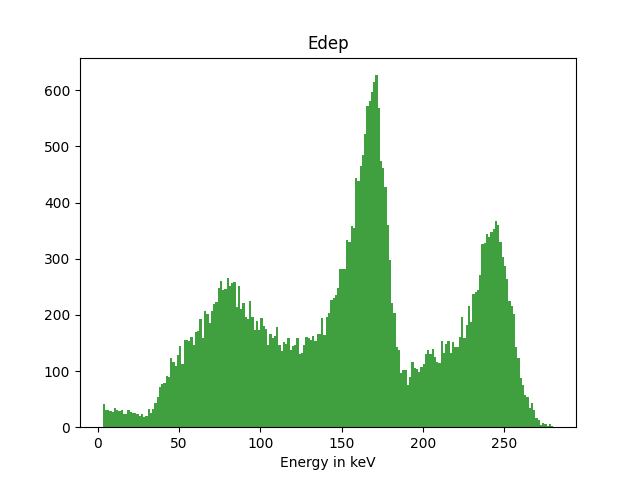

In [14]:
fig3, ax3 = plt.subplots()
energy = singles.arrays()['energy']/0.001
n, bins, patches = ax3.hist(energy, 200, facecolor='green', alpha=0.75)
ax3.set_title('Edep')
ax3.set_xlabel('Energy in keV')